In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/RAJESH/Of_Cr.csv",index_col='timestamp')

In [4]:
df.head(5),df.tail(5)

(                    pwr
 timestamp              
 01-01-2015 00:00  3.825
 01-01-2015 01:00  3.375
 01-01-2015 02:00  3.425
 01-01-2015 03:00  3.525
 01-01-2015 04:00  3.750,                     pwr
 timestamp              
 31-12-2015 19:00  3.250
 31-12-2015 20:00  2.525
 31-12-2015 21:00  3.050
 31-12-2015 22:00  2.550
 31-12-2015 23:00  3.175)

In [5]:
train_data = df.iloc[:8040]
test_data = df.iloc[8040:]

In [6]:
len(train_data),len(test_data)

(8040, 720)

In [7]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [8]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [9]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [10]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [11]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (8016, seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [12]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (8016, 24, 1)
y_train.shape =  (8016,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [13]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [14]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(24, activation='tanh'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 24)            2496      
                                                                 
 lstm_1 (LSTM)               (None, 24)                4704      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 7,225
Trainable params: 7,225
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
63/63 [==============================] - 5s 24ms/step - loss: 2.8763
Epoch 2/300
63/63 [==============================] - 2s 24ms/step - loss: 1.0665
Epoch 3/300
63/63 [==============================] - 2s 24ms/step - loss: 0.8908
Epoch 4/300
63/63 [==============================] - 1s 24ms/step - loss: 0.5950
Epoch 5/300
63/63 [==============================] - 2s 24ms/step - loss: 0.4778
Epoch 6/300
63/63 [==============================] - 2s 24ms/step - loss: 0.4526
Epoch 7/300
63/63 [==============================] - 2s 26ms/step - loss: 0.4352
Epoch 8/300
63/63 [==============================] - 2s 24ms/step - loss: 0.4229
Epoch 9/300
63/63 [==============================] - 2s 24ms/step - loss: 0.4133
Epoch 10/300
63/63 [==============================] - 1s 24ms/step - loss: 0.3955
Epoch 11/300
63/63 [==============================] - 1s 23ms/step - loss: 0.3882
Epoch 12/300
63/63 [==============================] - 2s 24ms/step - loss: 0.3737
Epoch 13/300
63/63 [=====

In [16]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [18]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [19]:
print('Root Mean Squared Error for Stacked LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for Stacked LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for Stacked LSTM Model for training is:',mae_train)
print('Mean Absolute Error for Stacked LSTM Model for testing is:',mae_test)
print('MAPE for Stacked Model for training is:',mape_train)
print('MAPE for Stacked Model for testing is:',mape_test)

Root Mean Squared Error for Stacked LSTM Model for training is: 0.49082811097469975
Root Mean Squared Error for Stacked LSTM Model for testing is: 0.5345290854004575
Mean Absolute Error for Stacked LSTM Model for training is: 0.38575887925003804
Mean Absolute Error for Stacked LSTM Model for testing is: 0.4157573498378158
MAPE for Stacked Model for training is: 0.12828967057812032
MAPE for Stacked Model for testing is: 0.13591818006843878


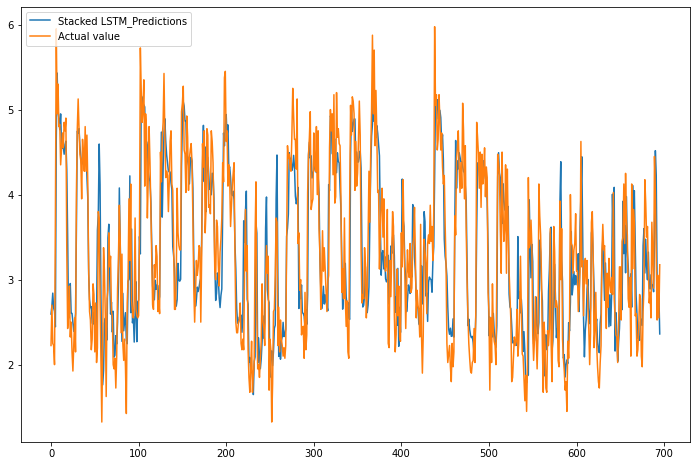

In [20]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='Stacked LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [22]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([2.2249999]), array([2.5949237], dtype=float32))

In [23]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([-0.36992383]), array([0.00986862]), array([-0.59125328]), array([-0.44089198]), array([-0.62896681]), array([1.27985716]), array([1.2969389]), array([-0.48045588]), array([0.3039341]), array([-0.09228516]), array([0.06212425]), array([-0.59924555]), array([-0.04758739]), array([0.17909002]), array([-0.01224136]), array([0.37514639]), array([0.16137457]), array([0.27165747]), array([-0.94635057]), array([-1.08203888]), array([0.02557802]), array([0.15050673]), array([-0.62935472]), array([-0.10444903]), array([-0.45274425]), array([-0.57184863]), array([-0.16546726]), array([0.0670352]), array([-0.45019293]), array([0.43518734]), array([0.03054476]), array([0.40453911]), array([-0.000875]), array([-0.09744215]), array([-0.04729319]), array([-0.40388656]), array([0.26610041]), array([-0.03379393]), array([-0.2120409]), array([0.32311821]), array([-0.22073221]), array([0.49203444]), array([0.16803861]), array([0.05490017]), array([-0.14392471]), array([-0.14516497]), array([-0.506

In [24]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([2.42226768]), array([-1.51613021]))

In [25]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [26]:
len(neg),len(pos)

(352, 344)